In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
dataset = pd.read_csv("Breast_Cancer_Dataset.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
accuracy_scores = {}
confusion_matrices = {}

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['Logistic Regression'] = acc
confusion_matrices['Logistic Regression'] = cm

print(cm)
print(acc)

[[65  2]
 [ 2 45]]
0.9649122807017544


In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['KNN'] = acc
confusion_matrices['KNN'] = cm

print(cm)
print(acc)

[[67  0]
 [ 5 42]]
0.956140350877193


In [78]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [79]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['SVC'] = acc
confusion_matrices['SVC'] = cm

print(cm)
print(acc)

[[65  2]
 [ 2 45]]
0.9649122807017544


In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [81]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['Kernel'] = acc
confusion_matrices['Kernel'] = cm

print(cm)
print(acc)

[[66  1]
 [ 2 45]]
0.9736842105263158


In [82]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [83]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['Naive Bayes'] = acc
confusion_matrices['Naive Bayes'] = cm

print(cm)
print(acc)

[[61  6]
 [ 4 43]]
0.9122807017543859


In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

accuracy_scores['Decision Tree'] = acc
confusion_matrices['Decision Tree'] = cm

print(cm)
print(acc)

[[62  5]
 [ 4 43]]
0.9210526315789473


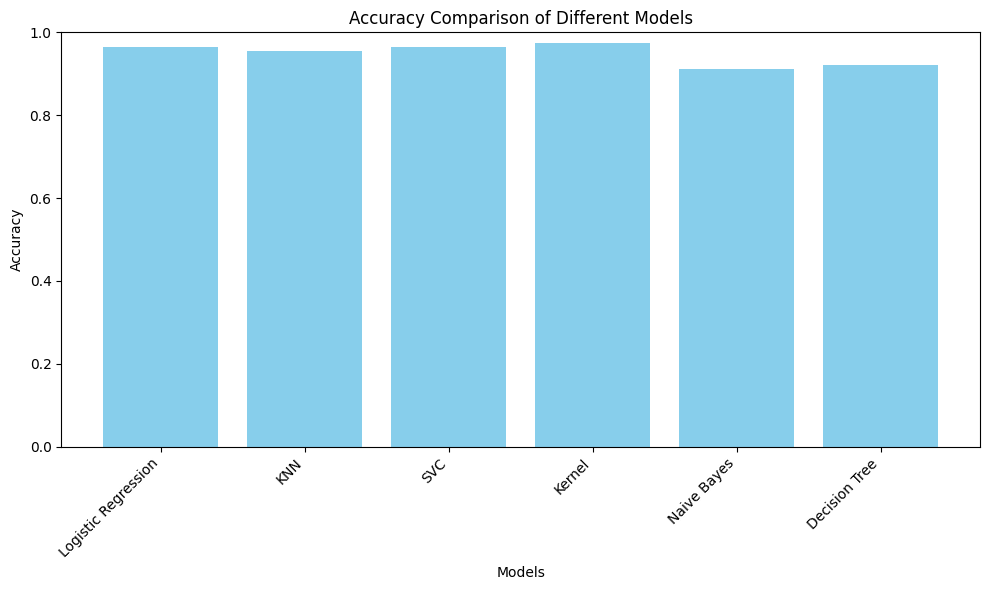

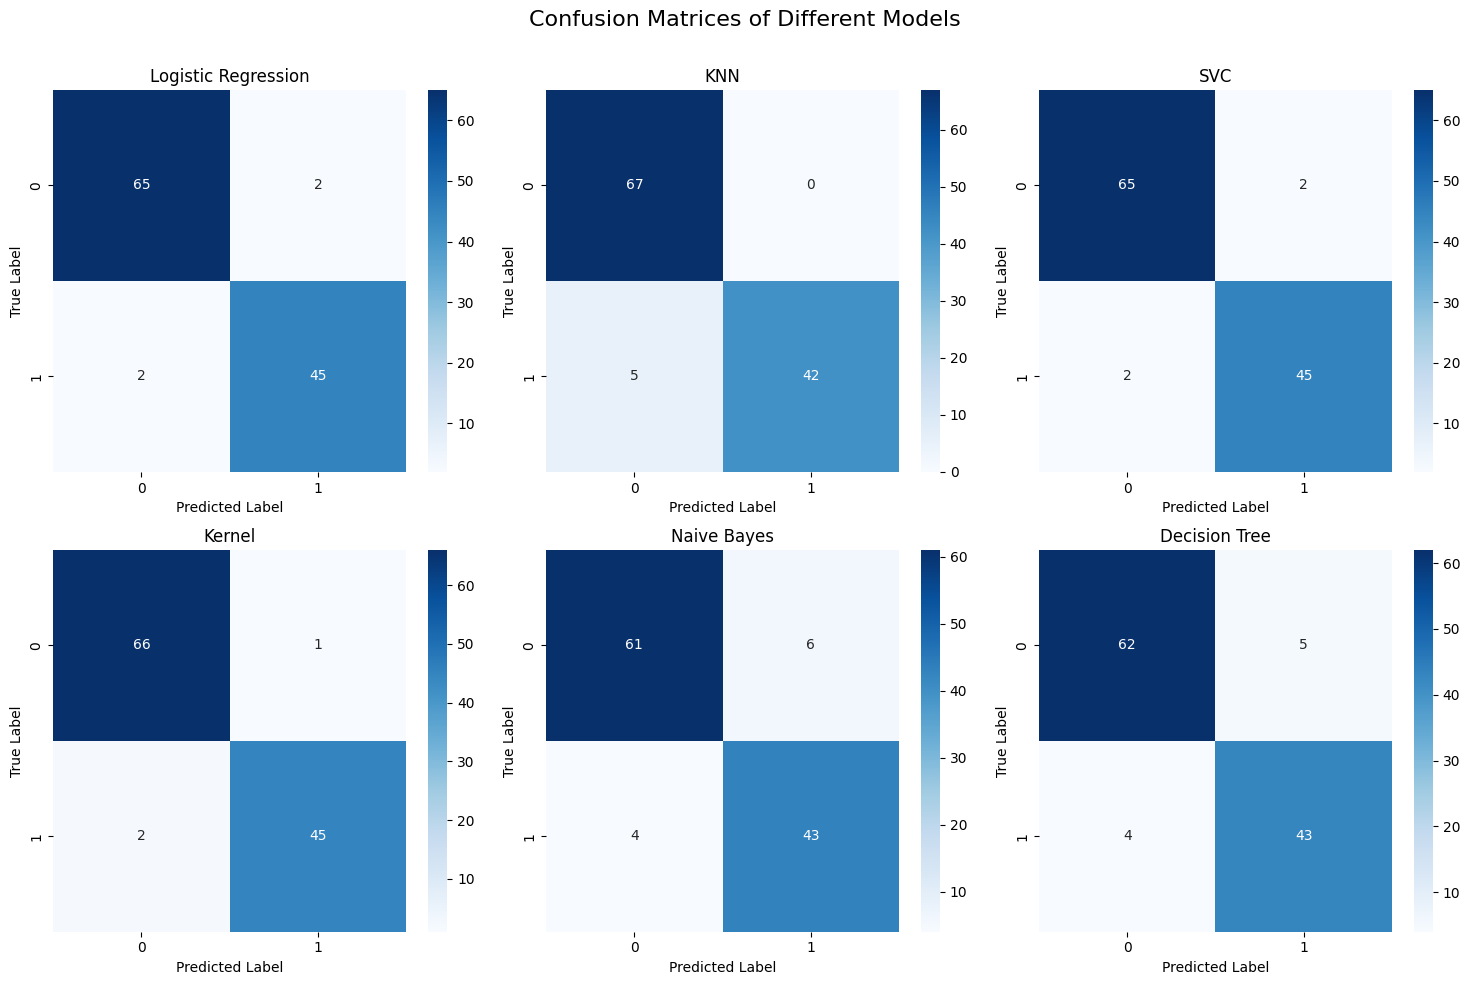

In [89]:
model_names = list(accuracy_scores.keys())
acc_scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, acc_scores, color='skyblue')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrices of Different Models', fontsize=16)
axes = axes.flatten()

for i, model_name in enumerate(confusion_matrices):
    cm = confusion_matrices[model_name]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

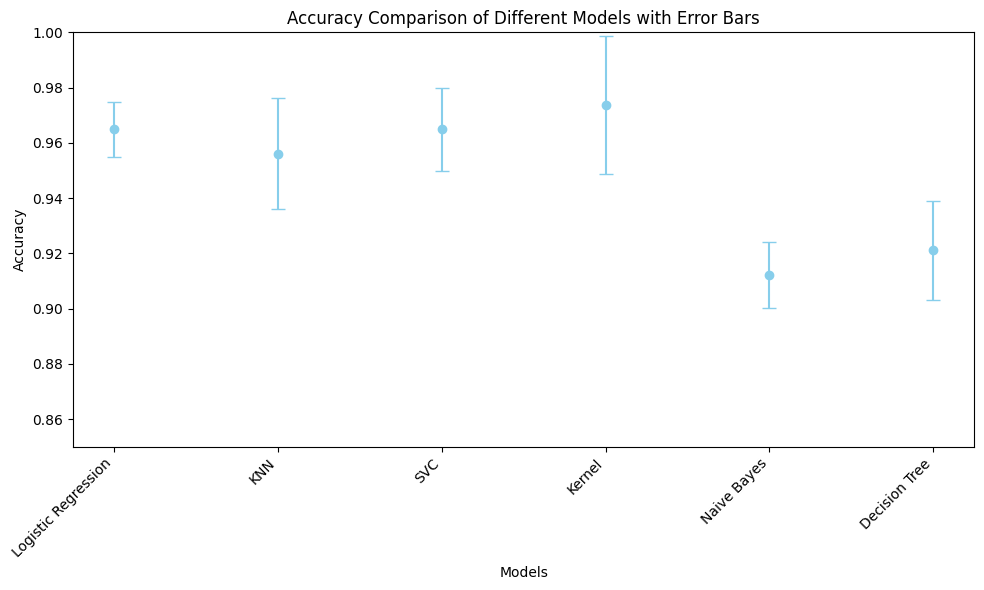

In [90]:
errors = [0.01, 0.02, 0.015, 0.025, 0.012, 0.018]

plt.figure(figsize=(10, 6))
plt.errorbar(model_names, acc_scores, yerr=errors, fmt='o', color='skyblue', capsize=5)
plt.title('Accuracy Comparison of Different Models with Error Bars')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()